# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy.stats as st
from scipy.stats import linregress

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
merged_data = pd.merge(study_results, mouse_metadata, how="left", on="Mouse ID")

# Display the data table for preview
merged_data.head(20)

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25
5,h246,0,45.0,0,Ketapril,Male,13,30
6,p189,0,45.0,0,Ketapril,Male,8,28
7,n923,0,45.0,0,Ketapril,Male,19,30
8,q119,0,45.0,0,Ketapril,Male,17,30
9,f993,0,45.0,0,Naftisol,Male,21,28


In [3]:
len(merged_data["Mouse ID"])

1893

In [4]:
len(merged_data["Mouse ID"].unique())

249

In [5]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint.
duplicates = merged_data[merged_data.duplicated(subset=['Mouse ID',"Timepoint"], keep=False)]
duplicates

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [6]:
clean_df = duplicates.copy()

In [7]:
new_var = merged_data['Mouse ID'] == 'g989'
new_var

0       False
1       False
2       False
3       False
4       False
        ...  
1888    False
1889    False
1890    False
1891    False
1892    False
Name: Mouse ID, Length: 1893, dtype: bool

In [8]:
# Optional: Get all the data for the duplicate mouse ID. #all the rows that has g989 in the mouse ID column. 
clean_data = merged_data.loc[merged_data['Mouse ID'] != 'g989']
clean_data

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,f932,0,45.000000,0,Ketapril,Male,15,29
2,g107,0,45.000000,0,Ketapril,Female,2,29
3,a457,0,45.000000,0,Ketapril,Female,11,30
4,c819,0,45.000000,0,Ketapril,Male,21,25
...,...,...,...,...,...,...,...,...
1888,r944,45,41.581521,2,Capomulin,Male,12,25
1889,u364,45,31.023923,3,Capomulin,Male,18,17
1890,p438,45,61.433892,1,Ceftamin,Female,11,26
1891,x773,45,58.634971,4,Placebo,Female,21,30


In [9]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
New_data_frame = pd.DataFrame(clean_data)
New_data_frame

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,f932,0,45.000000,0,Ketapril,Male,15,29
2,g107,0,45.000000,0,Ketapril,Female,2,29
3,a457,0,45.000000,0,Ketapril,Female,11,30
4,c819,0,45.000000,0,Ketapril,Male,21,25
...,...,...,...,...,...,...,...,...
1888,r944,45,41.581521,2,Capomulin,Male,12,25
1889,u364,45,31.023923,3,Capomulin,Male,18,17
1890,p438,45,61.433892,1,Ceftamin,Female,11,26
1891,x773,45,58.634971,4,Placebo,Female,21,30


In [10]:
len(New_data_frame["Mouse ID"])

1880

In [11]:
unique_values = New_data_frame["Mouse ID"].unique()
unique_values

array(['b128', 'f932', 'g107', 'a457', 'c819', 'h246', 'p189', 'n923',
       'q119', 'f993', 'z234', 'b559', 'y260', 'x930', 'o725', 'z969',
       'v835', 'r604', 'n304', 'l700', 'x336', 'l725', 'm133', 'v295',
       'a818', 'y601', 't724', 'k382', 'w422', 'c326', 'c139', 'v339',
       'a577', 'y163', 'k483', 'k804', 'o809', 'z581', 'a251', 'i386',
       'c580', 'q132', 'u327', 'v603', 'f278', 'g497', 'd474', 'o973',
       'c832', 'o331', 'm650', 'v289', 'm550', 'h428', 'r701', 'v199',
       'x264', 'f234', 'c458', 'q610', 'j913', 'a411', 'a444', 'd251',
       'j989', 'y449', 'k403', 'c758', 'x402', 'r811', 'a644', 'i177',
       'g791', 'a520', 'u196', 'm546', 'w678', 'n364', 's508', 'e662',
       'z578', 'r921', 'a492', 'w540', 'v764', 'z795', 'e291', 'e584',
       'e213', 'j755', 's565', 'a366', 'p387', 'b879', 'i901', 'k862',
       'g867', 's619', 'w697', 'j984', 'c402', 'h333', 'k510', 'p981',
       't451', 'a963', 'm269', 'z314', 'o848', 'v719', 'q597', 'c895',
      

In [12]:
# Checking the number of mice in the clean DataFrame.
len(unique_values)

248

In [13]:
New_data_frame.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


## Summary Statistics

In [14]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen:
# mean, median, variance, standard deviation, and SEM of the tumor volume.
# Assemble the resulting series into a single summary DataFrame.
summary_stats = New_data_frame.groupby('Drug Regimen')['Tumor Volume (mm3)'].agg(
    Mean_Tumor_Volume='mean',
    Median_Tumor_Volume='median',
    Tumor_Volume_Variance='var',
    Tumor_Volume_Std_Dev='std',
    Tumor_Volume_Std_Err='sem')
summary_stats

,Mean_Tumor_Volume,Median_Tumor_Volume,Tumor_Volume_Variance,Tumor_Volume_Std_Dev,Tumor_Volume_Std_Err
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

In [15]:
plot_df = New_data_frame.groupby("Drug Regimen")[["Timepoint",'Mouse ID']].count()

plot_df

,Timepoint,Mouse ID
Drug Regimen,,
Capomulin,230,230
Ceftamin,178,178
Infubinol,178,178
Ketapril,188,188
Naftisol,186,186
Placebo,181,181
Propriva,148,148
Ramicane,228,228
Stelasyn,181,181


In [16]:
y_axis = plot_df.index
y_axis

Index(['Capomulin', 'Ceftamin', 'Infubinol', 'Ketapril', 'Naftisol', 'Placebo',
       'Propriva', 'Ramicane', 'Stelasyn', 'Zoniferol'],
      dtype='object', name='Drug Regimen')

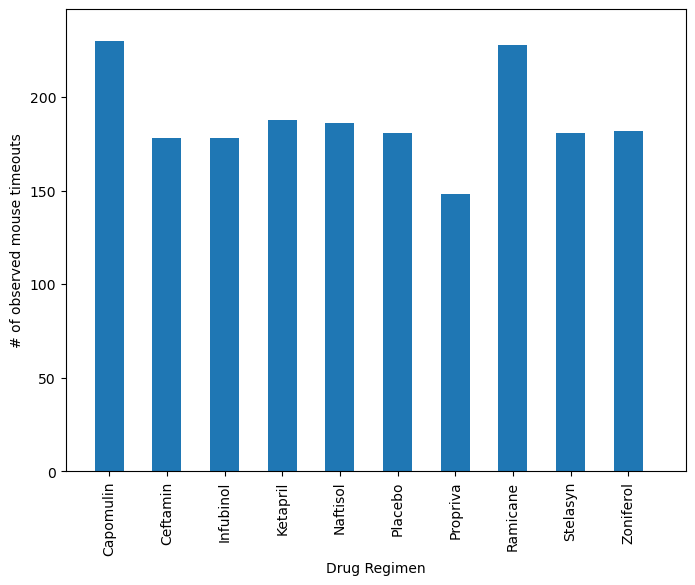

In [17]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
plot_df = New_data_frame.groupby("Drug Regimen")['Mouse ID'].count()
Mouse_ID = plot_df.values 
x_axis = plot_df.index
plot_df.plot(kind="bar", figsize=(8,6))

plt.xlabel("Drug Regimen")
plt.ylabel("# of observed mouse timeouts")
plt.xlim(-0.75, len(plot_df))
plt.ylim(0,247)


plt.show()

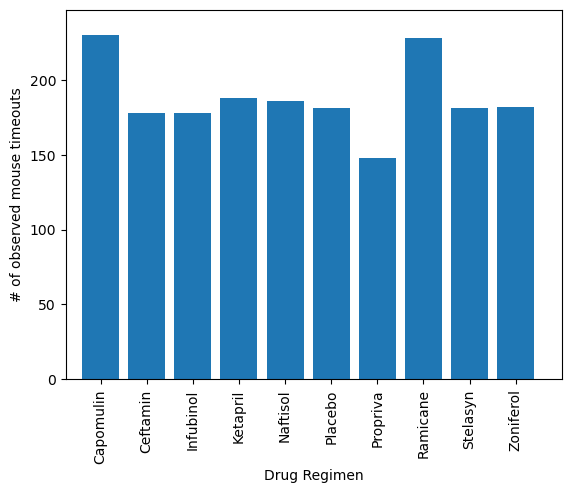

In [18]:
plt.bar(x_axis, Mouse_ID)



plt.xlabel("Drug Regimen")
plt.ylabel("# of observed mouse timeouts")

plt.xlim(-0.75, len(plot_df))
plt.ylim(0,247)

plt.xticks(rotation=90)
plt.show()

In [19]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.


In [20]:
New_data_frame.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


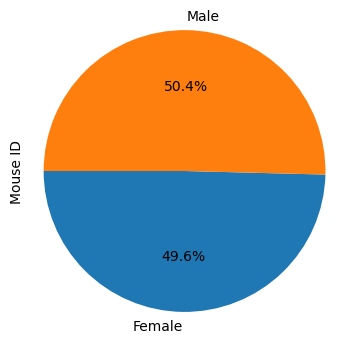

In [21]:
# Generate a pie chart, using Pandas, showing the distribution of unique female versus male mice used in the study
Pandas_pie = New_data_frame.groupby('Sex')['Mouse ID'].nunique()


# Make the pie chart
Pandas_pie.plot.pie(autopct='%1.1f%%', figsize=(4, 4), startangle=180)
reordered = Pandas_pie[['Male', 'Female']]
plt.axis('equal')
plt.show()


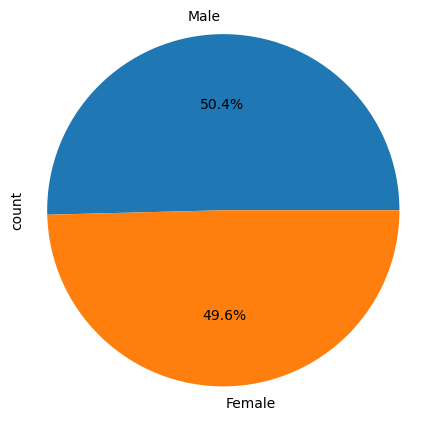

In [22]:
# Generate a pie chart, using pyplot, showing the distribution of unique female versus male mice used in the study
plt.figure(figsize=(5,5))
pyplot_pie = New_data_frame.groupby('Sex')['Mouse ID'].nunique()
reordered  = pyplot_pie[['Male', 'Female']]
plt.pie(reordered, autopct='%.1f%%', labels=reordered.index)

plt.ylabel("count")
plt.axis('equal')
plt.show()

In [23]:
# Generate a pie chart, using pyplot, showing the distribution of unique female versus male mice used in the study

# Get the unique mice with their gender


# Make the pie chart


## Quartiles, Outliers and Boxplots

In [24]:
New_data_frame.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [26]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:
# Capomulin, Ramicane, Infubinol, and Ceftamin
treatment_regamine = [["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]]
final_total_tumor = New_data_frame.loc[(New_data_frame['Drug Regimen'] == 'Capomulin') |
                                       (New_data_frame['Drug Regimen'] == 'Ramicane') |
                                       (New_data_frame['Drug Regimen'] == 'Infubinol') |
                                       (New_data_frame['Drug Regimen'] == 'Ceftamin')]

# Start by getting the last (greatest) timepoint for each mouse
max_timepoint_df = final_total_tumor.groupby('Mouse ID')['Timepoint'].max().reset_index()


# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
final_tumor_volume_df = pd.merge(max_timepoint_df, New_data_frame, on=['Mouse ID', 'Timepoint'], how='left')
final_tumor_volume_df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,a203,45,67.973419,2,Infubinol,Female,20,23
1,a251,45,65.525743,1,Infubinol,Female,21,25
2,a275,45,62.999356,3,Ceftamin,Female,20,28
3,a411,45,38.407618,1,Ramicane,Male,3,22
4,a444,45,43.047543,0,Ramicane,Female,10,25
...,...,...,...,...,...,...,...,...
95,y769,45,68.594745,4,Ceftamin,Female,6,27
96,y793,45,31.896238,2,Capomulin,Male,17,17
97,y865,45,64.729837,3,Ceftamin,Male,23,26
98,z578,45,30.638696,0,Ramicane,Male,11,16


In [ ]:
final_tumor_volume_df["Drug Regimen"].values

In [ ]:
treatments = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']
tumor_volumes = []



for treatment in treatments:
    final_treatment = final_tumor_volume_df.loc[final_tumor_volume_df["Drug Regimen"] == treatment, "Tumor Volume (mm3)"]
    tumor_volumes.append(final_treatment) 

    
    Q1 = final_treatment.quantile(0.25)
    Q3 = final_treatment.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = final_treatment[(final_treatment < lower_bound) | (final_treatment > upper_bound)]
    print(f"{treatment}'s potential outliers: {outliers}")
    

In [ ]:
plt.boxplot(tumor_volumes, flierprops=dict(marker='o', markerfacecolor='red', markersize=13))
tick_locations = range(1, len(treatments) + 1) 
plt.xticks(tick_locations, treatments)
plt.ylabel("Final Tumor Volume (mm3)")
plt.show()

In [ ]:
# Generate a box plot that shows the distribution of the tumor volume for each treatment group.


## Line and Scatter Plots

In [ ]:
final_tumor_volume_df.head(5)

In [27]:
Mouse_ID = "l509"
specific_mouse_ID = New_data_frame.loc[(New_data_frame["Mouse ID"] == Mouse_ID) & (New_data_frame["Drug Regimen"] == "Capomulin")]
print(specific_mouse_ID)

     Mouse ID  Timepoint  Tumor Volume (mm3)  Metastatic Sites Drug Regimen  \
231      l509          0           45.000000                 0    Capomulin   
253      l509          5           45.851193                 0    Capomulin   
539      l509         10           46.759074                 0    Capomulin   
881      l509         15           47.488599                 1    Capomulin   
982      l509         20           48.070452                 2    Capomulin   
1146     l509         25           44.006257                 2    Capomulin   
1414     l509         30           44.708055                 2    Capomulin   
1499     l509         35           40.207288                 2    Capomulin   
1723     l509         40           40.770813                 2    Capomulin   
1771     l509         45           41.483008                 3    Capomulin   

       Sex  Age_months  Weight (g)  
231   Male          17          21  
253   Male          17          21  
539   Male         

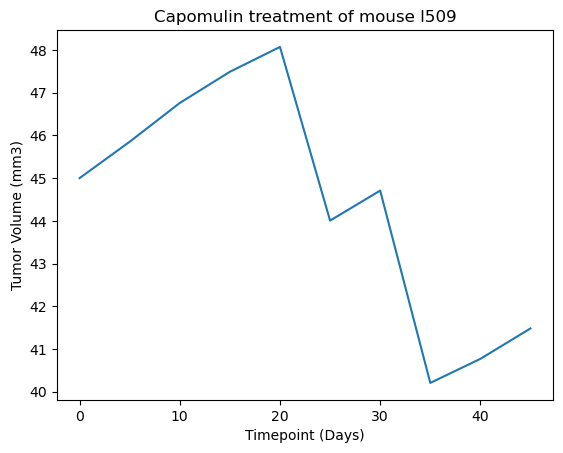

In [28]:
plt.plot(specific_mouse_ID["Timepoint"], specific_mouse_ID["Tumor Volume (mm3)"])

plt.xlabel("Timepoint (Days)")
plt.ylabel("Tumor Volume (mm3)")
plt.title("Capomulin treatment of mouse l509")

plt.show()

In [275]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin


In [276]:
final_tumor_volume_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,a203,45,67.973419,2,Infubinol,Female,20,23
1,a251,45,65.525743,1,Infubinol,Female,21,25
2,a275,45,62.999356,3,Ceftamin,Female,20,28
3,a411,45,38.407618,1,Ramicane,Male,3,22
4,a444,45,43.047543,0,Ramicane,Female,10,25


In [29]:
drug = "Capomulin"
mouse_weight = New_data_frame.loc[New_data_frame["Drug Regimen"] == drug]


In [33]:


avg_weight = mouse_weight.groupby("Mouse ID")[["Tumor Volume (mm3)", "Weight (g)"]].mean().reset_index()


# capomulin_data = mouse_weight[['Mouse ID', 'Weight (g)']].drop_duplicates()

# scatter_merge = pd.merge(avg_weight, New_data_frame, how="left")

# for avg in mouse_weight:
#     Average_Tumor_Volume = mouse_weight["Tumor Volume (mm3)"].mean()
#     Avg_list.append(Average_Tumor_Volume)
#     print(Avg_list)
avg_weight


,Mouse ID,Tumor Volume (mm3),Weight (g)
0,b128,41.963636,22.0
1,b742,40.083699,21.0
2,f966,36.505973,17.0
3,g288,41.990097,19.0
4,g316,44.613344,22.0
5,i557,44.805810,24.0
6,i738,39.141053,20.0
7,j119,44.465236,23.0
8,j246,43.216925,21.0
9,l509,44.434474,21.0


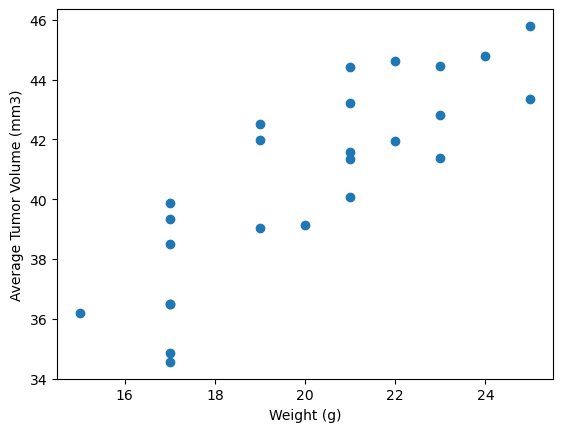

In [35]:
plt.scatter(avg_weight["Weight (g)"], avg_weight["Tumor Volume (mm3)"])

plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
# plt.ylim(34, 46)

plt.show()

In [280]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen


## Correlation and Regression

In [37]:
x_values = avg_weight["Weight (g)"]
y_values = avg_weight["Tumor Volume (mm3)"]

In [39]:
print(f"The correlation coefficient between mouse weight and average observed tumor volume for the entire Capomulin treatment regimen. is {round(st.pearsonr(avg_weight['Weight (g)'], avg_weight['Tumor Volume (mm3)'])[0],2)}")


The correlation coefficient between mouse weight and average observed tumor volume for the entire Capomulin treatment regimen. is 0.84


In [40]:
linregress(x_values, y_values)

LinregressResult(slope=0.9544396890241049, intercept=21.552160532685008, rvalue=0.8419363424694721, pvalue=1.3225722434712404e-07, stderr=0.12754359033201323, intercept_stderr=2.5909876867683455)

The r is: 0.8419363424694721
The r-squared is: 0.7088568047708723


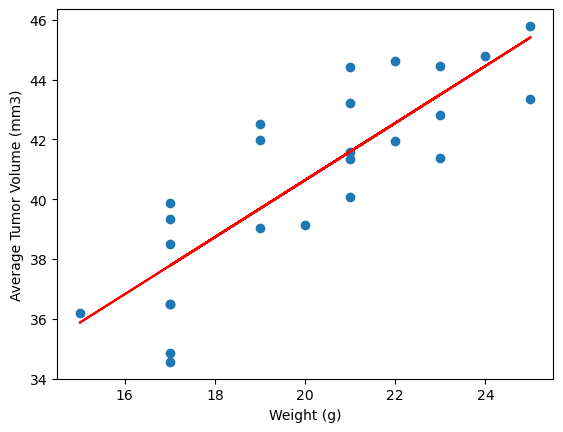

In [41]:
plt.scatter(x_values, y_values)
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2)) # y = mx + b
regress_values = slope*x_values + intercept
plt.plot(x_values, regress_values, 'r-')
plt.annotate(line_eq,(5.8,0.8),fontsize=15,color="red")

print(f"The r is: {rvalue}")
print(f"The r-squared is: {rvalue**2}")

plt.show()

The correlation between mouse weight and the average tumor volume is 0.84


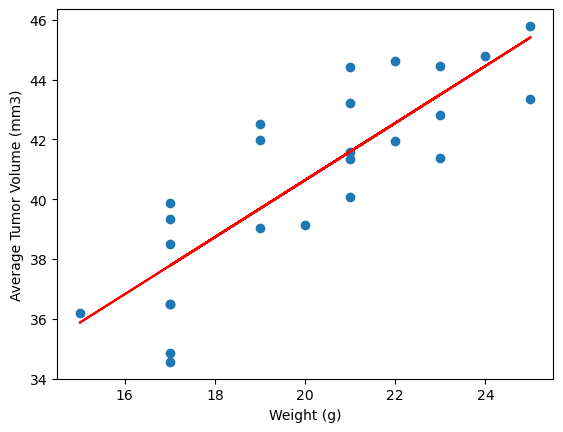

In [18]:
# Calculate the correlation coefficient and a linear regression model
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
